## Part2-进行IMDB影评的分类
这个任务为二分类任务，分为positive和negative两类

In [1]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# 导入数据
# num_words=10000表示我们只需要top10000经常出现的word
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
# 我们来看一下数据的shape,25000个样本的训练集和25000个样本的测试集
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(25000,) (25000,)
(25000,) (25000,)


In [4]:
# 从这里看出，每个样本的长度是不一致的
print(len(train_data[0]), len(train_data[1]))

218 189


In [5]:
# 这些数字都是word的representation
train_data[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [6]:
# 在这里，我们也可以将index->word
word_index = imdb.get_word_index()
# 将word和index创建字典
reverse_word_index = dict(
[value, key] for (key, value) in word_index.items())
# 这里我们为什么要从3开始呢，因为0：为填充， 1为序列的开始，2为unknown
decode_review = ''.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

### data process

In [7]:
# 这一步是为了将数据vector化，以便后面可以input到网络中
def vectorize_sequence(sequences, dimensions=10000):
    # 创建一个(n_samples, n_dim)的矩阵
    results = np.zeros((len(sequences), dimensions))
    # 这一句代码的意思是，因为是10000个word，一段影评中，一般可能全部词语都出现，
    # 所以我们将出现的词语的index的置1，没有出现的为0
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [8]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [9]:
print(x_train.shape)

(25000, 10000)


In [10]:
## 这里要将label与vector/array化
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [11]:
print(y_train.shape)
print(y_train[0])

(25000,)
1.0


In [12]:
# 按照7：3的比例分割training_set和val_set
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.3, random_state=42)

In [13]:
print(x_train.shape)

(17500, 10000)


### Buliding the Network

In [14]:
model = Sequential()
# 因为输入层是10000个特征，所以input_shape为(10000, 16)
model.add(Dense(units=16, activation='relu', input_shape=(10000, )))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# compile
# 当然，你也可以选择其它的优化器，例如Adam/SGD..
# 你也可以选择mse等其它的loss function， 但是我认为binary_crossentropy是二分类较好的loss function，因为最后输出的是概率
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(x=x_train, y=y_train, batch_size=512, epochs=20, validation_data=(x_val, y_val))

Train on 17500 samples, validate on 7500 samples
Epoch 1/20
17500/17500 [==============================] - 3s 147us/step - loss: 0.4988 - acc: 0.7954 - val_loss: 0.3681 - val_acc: 0.8704
Epoch 2/20
17500/17500 [==============================] - 2s 95us/step - loss: 0.2859 - acc: 0.9050 - val_loss: 0.3069 - val_acc: 0.8792
Epoch 3/20
17500/17500 [==============================] - 2s 95us/step - loss: 0.2107 - acc: 0.9306 - val_loss: 0.2827 - val_acc: 0.8796
Epoch 4/20
17500/17500 [==============================] - 2s 97us/step - loss: 0.1670 - acc: 0.9431 - val_loss: 0.2896 - val_acc: 0.8776
Epoch 5/20
17500/17500 [==============================] - 2s 100us/step - loss: 0.1403 - acc: 0.9535 - val_loss: 0.2892 - val_acc: 0.8820
Epoch 6/20
17500/17500 [==============================] - 2s 97us/step - loss: 0.1137 - acc: 0.9637 - val_loss: 0.3199 - val_acc: 0.8759
Epoch 7/20
17500/17500 [==============================] - 2s 98us/step - loss: 0.0957 - acc: 0.9697 - val_loss: 0.3332 - val_ac

In [16]:
# 查看模型训练返回的结果
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_acc', 'loss', 'val_loss', 'acc'])


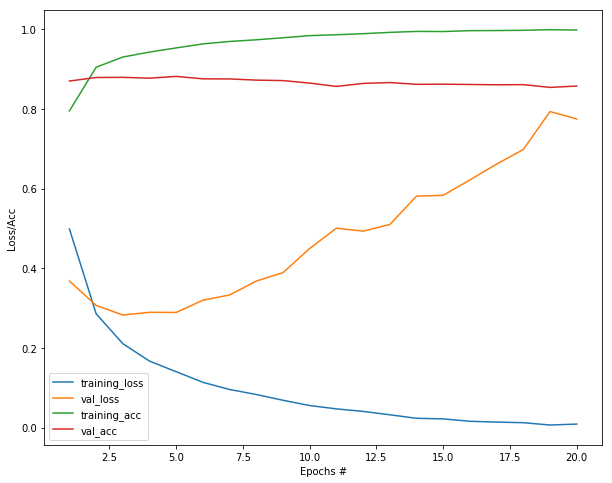

In [17]:
# 绘图
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(train_acc) + 1)

plt.figure(figsize=(10, 8))

plt.plot(epochs, train_loss, label='training_loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.plot(epochs, train_acc, label='training_acc')
plt.plot(epochs, val_acc, label='val_acc')
plt.xlabel('Epochs #')
plt.ylabel('Loss/Acc')
plt.legend()
plt.show()

## 任务：
有兴趣的同学，可以尝试下继续训练模型，更换参数，改变隐藏层的units数量，如32，64，128...<br>
更换Adam/SGD等优化器
更换mse loss function做对比